# 13.1. Percentiles

- Numerical data can be sorted in increasing or decreasing **order**. Thus the values of a numerical data set have a rank order. A **percentile is the value at a particular rank**.
- For example, if your score on a test is on the **95th percentile**, a common interpretation is that only 5% of the scores were higher than yours.
- The **median** is the 50th percentile; it is commonly assumed that **50%** the values in a data set are above the median.
- Be careful about cases sudh as ties and when the index is not clear; e.g., 87th percentile of a collection of 10 values?

## 13.1.1. A Numerical Example
- A case definition: Before giving a general definition of all percentiles, we will define the 80th percentile of a collection of values to be the smallest value in the collection that is at least as large as 80% of all of the values
- five largest continents – Africa, Antarctica, Asia, North America, and South America – rounded to the nearest million square miles:

In [9]:
from datascience import *

sizes = make_array(12, 17, 6, 9, 7)
type(sizes)

numpy.ndarray

The 80th percentile: at least as large as 80% of the elements

In [10]:
import numpy as np

np.sort(sizes)

array([ 6,  7,  9, 12, 17])

In [11]:
### 20th percentile 
### 20/100 * n
n = len(sizes)
20/100 * n

1.0

In [12]:
### 20/100 * n is an integer
sizes[0]

12

In [13]:
### 25th percentile
### 25/100 * n
25/100 * 5

1.25

In [14]:
### 20/100 * n (1.25) is NOT an integer, 
### take (round to) the next integer
np.ceil(25/100 * 5)

2.0

In [15]:
sizes[1]

17

In [16]:
percentile(25, sizes)

7

- This is a rank
- The 80th percentile is a value on the list, namely 12. 
- You can see that 80% of the values are less than or equal to it, and that it is the smallest value on the list for which this is true.
- the 70th percentile is the smallest value in the collection that is at least as large as 70% of the elements of sizes. Now 70% of 5 elements is “3.5 elements”, so the 70th percentile is the 4th element on the list. That’s 12, the same as the 80th percentile for these data.

## 13.1.2. The percentile function

In [17]:
### The percentile function takes two arguments: a rank between 0 and 100, and a array. 
### It returns the corresponding percentile of the array.

percentile(70, sizes)

12

### 13.1.2.1. The General Definition

- Let *p* be a number between 0 and 100. The *p***th percentile of a collection** is the smallest value in the collection that is at least as large as p% of all the values.
- By this definition, any percentile between 0 and 100 can be computed for any collection of values, and it is always an element of the collection.
- In practical terms, suppose there are *n* elements in the collection. To find the *p*th percentile:
  - Sort the collection in increasing order.
  - Find p% of n, call that *k*. 
  - If *k* is an integer, take the *k*th element of the sorted collection.
  - If *k* is **not an integer**, round it up to the next integer, and take that element of the sorted collection.


### 13.1.2.2. Example 

- The table scores_and_sections contains one row for each student in a class of 359 students.
- The columns are the student’s discussion section and midterm score.

In [18]:
path_data = '../../data/'     ### data directory path
from datascience import *     ### import datascience

In [19]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


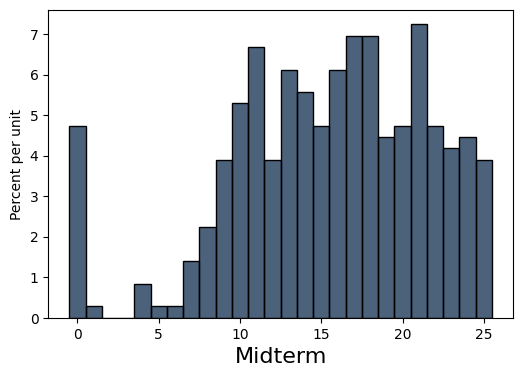

In [20]:
### histogram: midterm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# scores_and_sections.select('Midterm').hist()
scores_and_sections.select('Midterm').hist(bins = np.arange(-0.5, 25.6, 1))   ### range: Start, Stop, Step

In [21]:
scores = scores_and_sections.column('Midterm')   ### column/array
# scores

percentile(85, scores)   ### rank & list

### the 85th percentile is 22

22

In [22]:
scores_sorted = np.sort(scores_and_sections.column('Midterm'))

In [23]:
len(scores)

359

In [30]:
scores_tbl = Table().with_column('Midterm', scores)
# scores_tbl.hist()
scores_tbl

Midterm
22
12
23
14
20
25
19
24
8
14


In [36]:
percentile(50, scores_tbl.column("Midterm"))

16

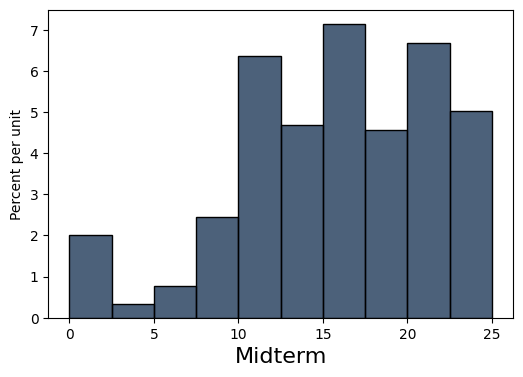

In [31]:
scores_tbl.hist("Midterm")

In [ ]:
359 * .85 

In [ ]:
scores_sorted[305]

## 13.1.3. Quartiles

- The first quartile of a numercial collection is the 25th percentile. The terminology arises from the first quarter. The second quartile is the median, and the third quartile is the 75th percentile.

In [ ]:
### first quartile
percentile(25, scores)

In [ ]:
### second quartile
percentile(50, scores)

In [ ]:
### third quartile
percentile(75, scores)

In [ ]:
### Distributions of scores are sometimes summarized by the “middle 50%” 
### interval, between the first and third quartiles.